## Basic Co-Occurrence Analysis of Human-Cell-Atlas Pancreas Topograhic Maps

Data from Tosti et al, 2021

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
from sonar import sonar, utils

In [4]:
rel_kernel_path = 'test/ISS-pancreas' #"."


In [5]:
# Define the cluster labels of the pancreas tissue matrix:

cluster_labels = ['background',
 'Acinar-i',
 'Acinar-s',
 'Acinar-REG+',
 'Activated Stellate',
 'Quiescent Stellate',
 'Alpha',
 'Beta',
 'Gamma (PP)',
 'Delta',
 'Ductal',
 'MUC5B+ Ductal (PDG)',
 'MHC Class II',
 'Schwan',
 'B cell',
 'T cell',
# 'Endothelial'
]

In [6]:
# to be removed:
# n_sample1 = 1
# n_sample2 = 2
# n_sample3 = 3
# n_sample4 = 4


# # Load the pancreas tissue matrix:

# tissue_matrix1 = np.load(os.path.join( *rel_kernel_path.split('/'), 'data','sample_matrices.npz'))['sample_'+str(n_sample1)]
# tissue_matrix2 = np.load(os.path.join( *rel_kernel_path.split('/'), 'data','sample_matrices.npz'))['sample_'+str(n_sample2)]
# tissue_matrix3 = np.load(os.path.join( *rel_kernel_path.split('/'), 'data','sample_matrices.npz'))['sample_'+str(n_sample3)]
# tissue_matrix4 = np.load(os.path.join( *rel_kernel_path.split('/'), 'data','sample_matrices.npz'))['sample_'+str(n_sample4)]

In [ ]:
sample_list = [1,2,3,4]
tissue_matrix_list = []

# Load the pancreas tissue matrix:
for sample in sample_list:
    tissue_matrix = np.load(os.path.join( *rel_kernel_path.split('/'), 'data','sample_matrices.npz'))['sample_'+str(sample)]
    tissue_matrix_list.append(tissue_matrix)

In [7]:
# plt.figure(figsize=(10,10))
# plt.imshow(tissue_matrix4.argmax(axis=0),cmap='nipy_spectral',interpolation='none',vmax=len(cluster_labels)-1,alpha=(tissue_matrix4.sum(0)!=0).astype(float))

# # Create a legend for different tissue types:
# legend_elements = [plt.scatter([],[],c=plt.cm.nipy_spectral(i/len(cluster_labels)),label=cluster_labels[i]) for i in range(len(cluster_labels))]

# plt.legend(handles=legend_elements,loc='upper right')

In [8]:
# # to be removed:
# rescaled1 = utils.rescale_topographic_tensor(tissue_matrix1, scaling_factor=0.5).numpy()
# rescaled2 = utils.rescale_topographic_tensor(tissue_matrix2, scaling_factor=0.5).numpy()
# rescaled3 = utils.rescale_topographic_tensor(tissue_matrix3, scaling_factor=0.5).numpy()
# rescaled4 = utils.rescale_topographic_tensor(tissue_matrix4, scaling_factor=0.5).numpy()

In [ ]:
rescaled_list = []

for tissue_matrix in tissue_matrix_list:
    rescaled = utils.rescale_topographic_tensor(tissue_matrix, scaling_factor=0.5).numpy()
    rescaled_list.append(rescaled)

In [9]:
# plt.imshow(rescaled.argmax(axis=0),cmap='nipy_spectral',interpolation='none',vmax=len(cluster_labels)-1,alpha=(rescaled.sum(0)!=0).astype(float))

Changing tasks between cpu and gpu

In [10]:
import torch

if torch.cuda.is_available():
    import torch as t
    device = 'cuda:0' # put it in a gpu
else:
    import torch as t
    device='cpu'

# unrelated to the NoteBook, the example of a tensor and how to work with it:
# new_tens = t.zeros(2,2,2, device=device).cuda()
# new_tens.device

In [11]:
def sig(t, k=1):
    return ((1)/(1+(torch.exp(-t*k))))

def smax(t,k=5):
    return (torch.exp(t*k)/(torch.exp(t*k).sum(0)))

rad_ = 100
lin = 1

son = sonar.Sonar(max_radius=rad_,linear_steps=lin)




In [12]:
# to be removed:
# cooc_template1_ = son.co_occurrence_from_tensor(rescaled1,interpolate=True)
# cooc_template2_ = son.co_occurrence_from_tensor(rescaled2,interpolate=True)
# cooc_template3_ = son.co_occurrence_from_tensor(rescaled3,interpolate=True)
# cooc_template4_ = son.co_occurrence_from_tensor(rescaled4,interpolate=True)

In [ ]:
cooc_template_list = []

for rescaled in rescaled_list:
    cooc_template_ = son.co_occurrence_from_tensor(rescaled,interpolate=True)
    cooc_template_list.append(cooc_template_)

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]

for cooc_template_ in cooc_template_list:
    plt.plot(cooc_template_[7,6])

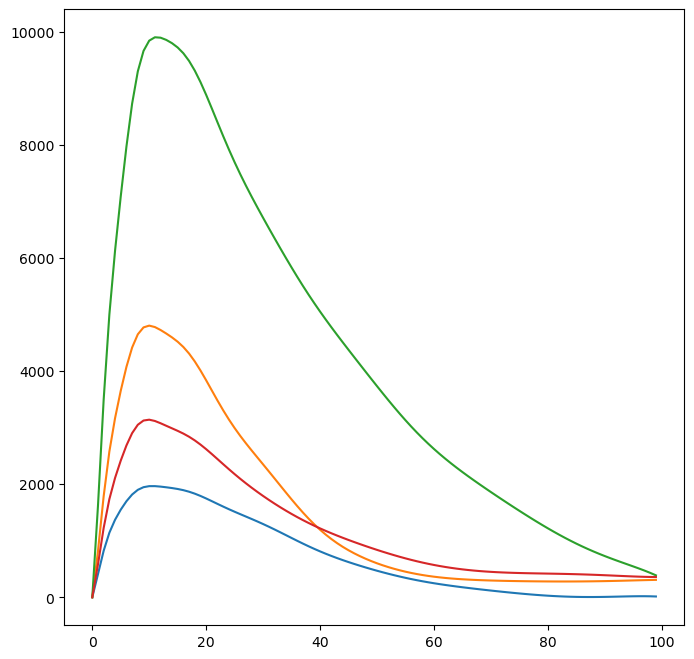

In [55]:
# # to be removed:
# plt.rcParams['figure.figsize'] = [8, 8]
# plt.plot(cooc_template1_[7,6])
# plt.plot(cooc_template2_[7,6])
# plt.plot(cooc_template3_[7,6])
# plt.plot(cooc_template4_[7,6])

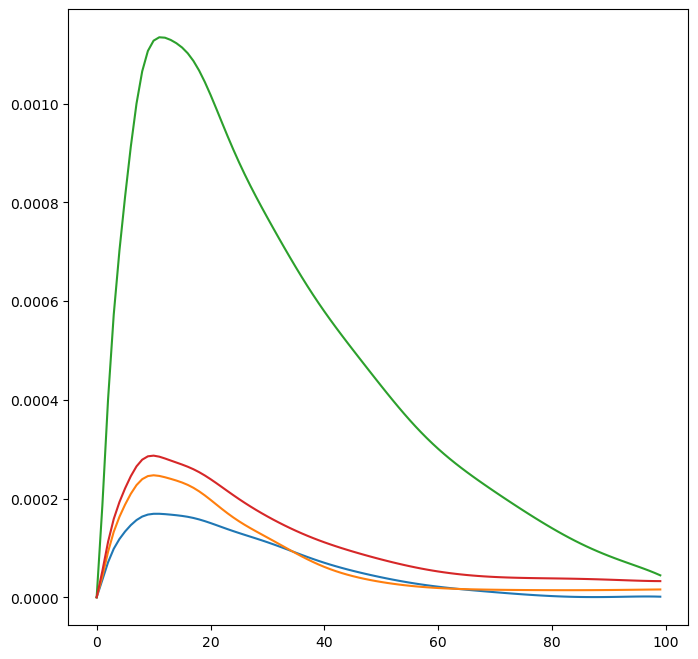

In [56]:
# # to be removed:
# plt.rcParams['figure.figsize'] = [8, 8]
# plt.plot(cooc_template1_[7,6]/np.count_nonzero(rescaled1))
# plt.plot(cooc_template2_[7,6]/np.count_nonzero(rescaled2))
# plt.plot(cooc_template3_[7,6]/np.count_nonzero(rescaled3))
# plt.plot(cooc_template4_[7,6]/np.count_nonzero(rescaled4))

In [ ]:
# normalisation:

plt.rcParams['figure.figsize'] = [8, 8]
for cooc_template_, rescaled in zip(cooc_template_list, rescaled_list):
    plt.plot(cooc_template_[7,6]/np.count_nonzero(rescaled))

.......... haven't been improved ............

In [57]:
a1 = ((np.count_nonzero(rescaled1[7]))/np.count_nonzero(rescaled1))*((np.count_nonzero(rescaled1[6]))/np.count_nonzero(rescaled1))
a2 = ((np.count_nonzero(rescaled2[7]))/np.count_nonzero(rescaled2))*((np.count_nonzero(rescaled2[6]))/np.count_nonzero(rescaled2))
a3 = ((np.count_nonzero(rescaled3[7]))/np.count_nonzero(rescaled3))*((np.count_nonzero(rescaled3[6]))/np.count_nonzero(rescaled3))
a4 = ((np.count_nonzero(rescaled4[7]))/np.count_nonzero(rescaled4))*((np.count_nonzero(rescaled4[6]))/np.count_nonzero(rescaled4))

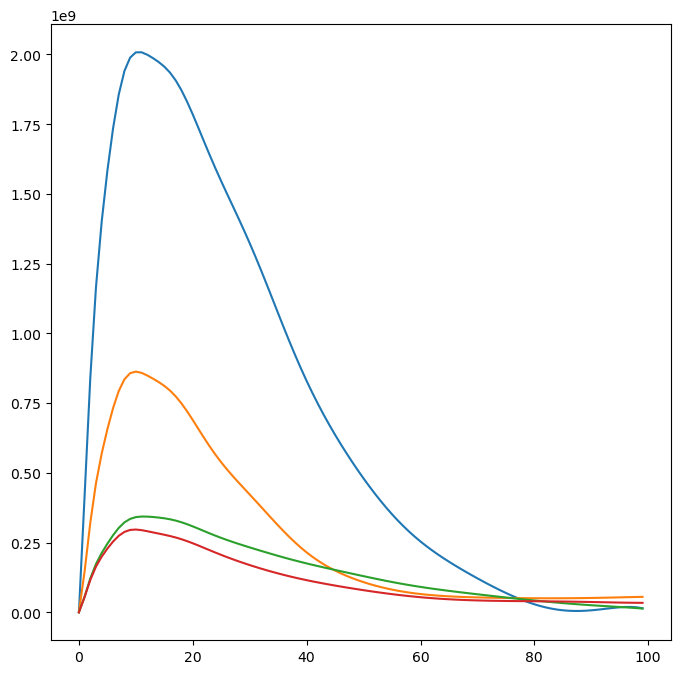

In [58]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot(cooc_template1_[7,6]/a1)
plt.plot(cooc_template2_[7,6]/a2)
plt.plot(cooc_template3_[7,6]/a3)
plt.plot(cooc_template4_[7,6]/a4)

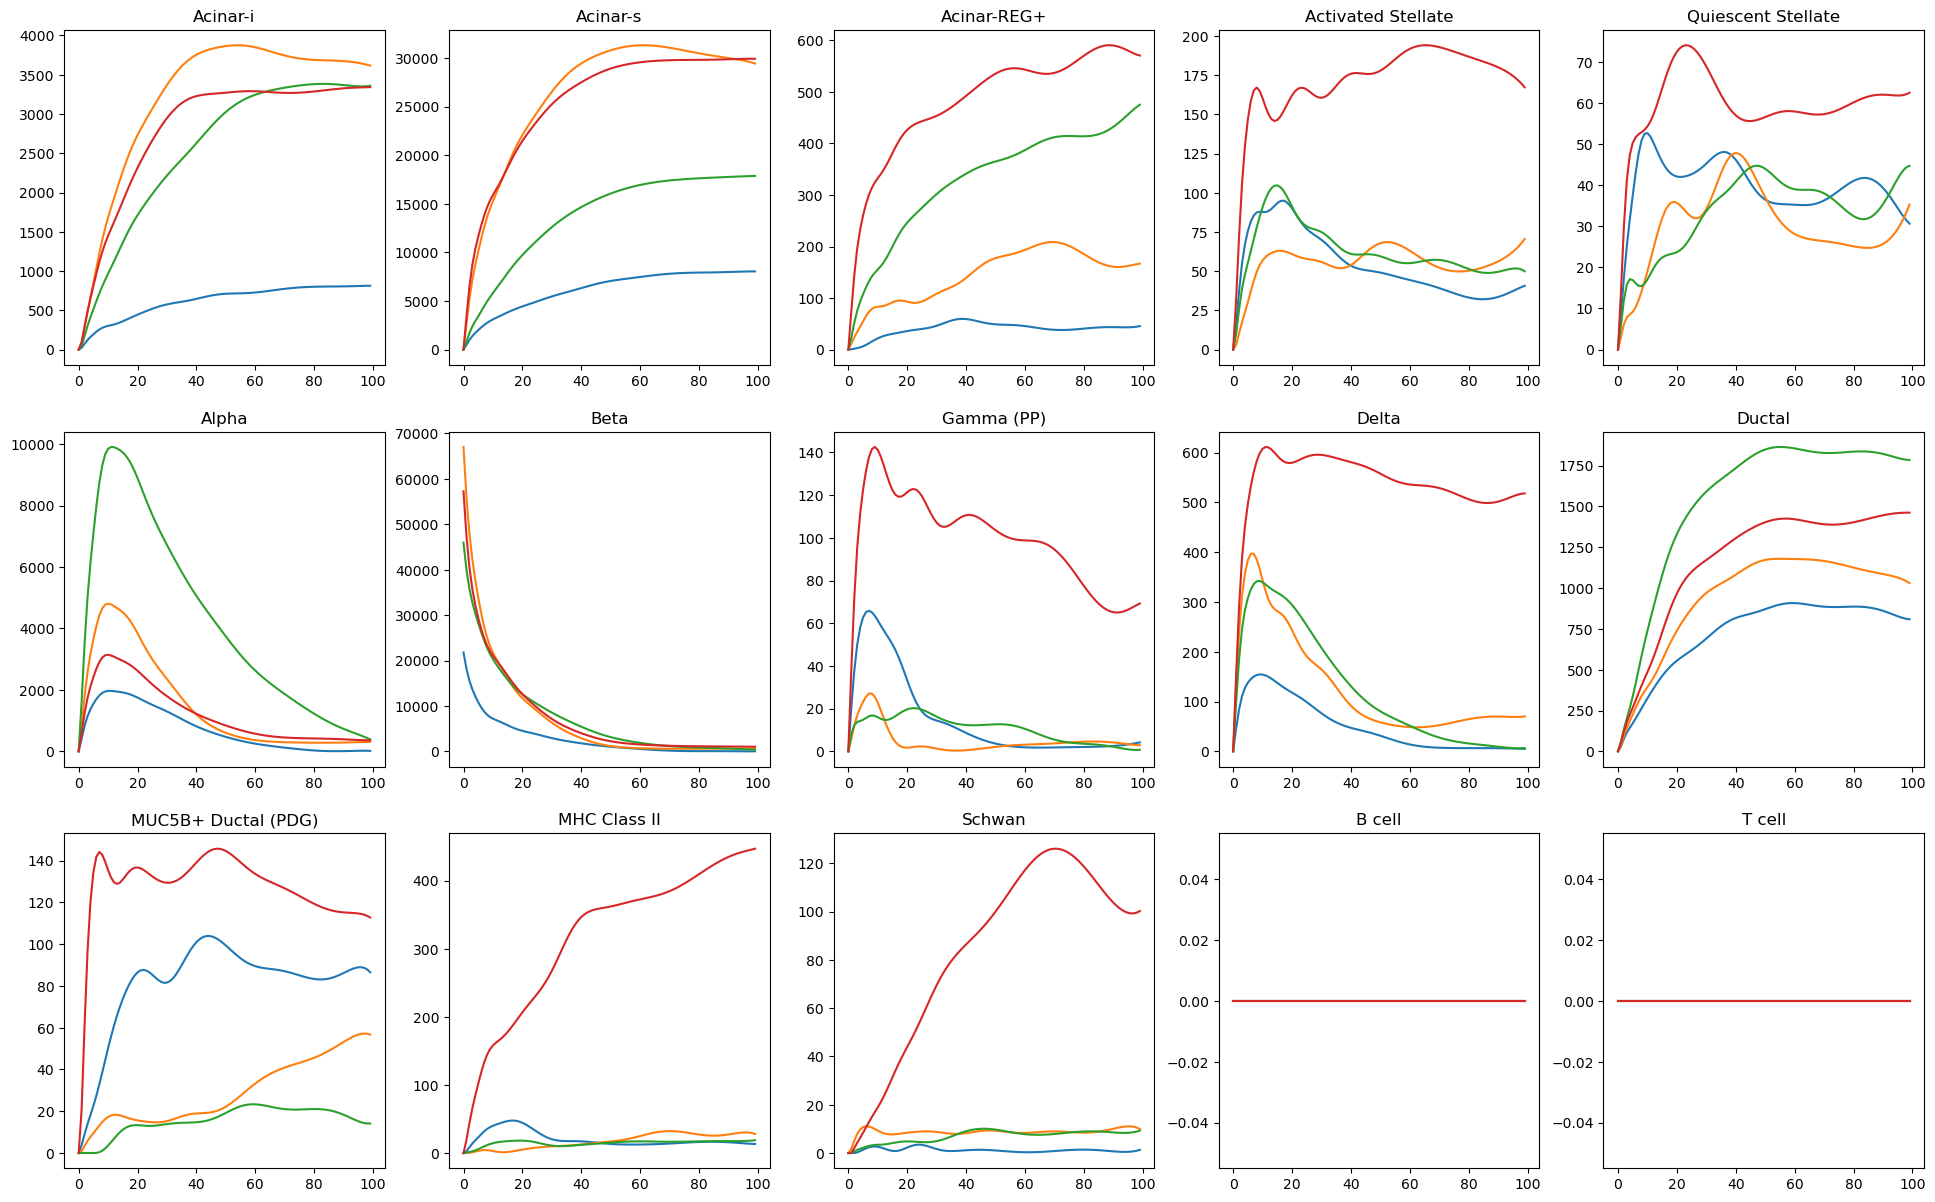

In [61]:
for im in range (15):
    
    plt.subplot(4,5, im+1) #background excluded
    plt.rcParams['figure.figsize'] = [24, 20]
    plt.plot(cooc_template1_[7,im+1])
    plt.plot(cooc_template2_[7,im+1])
    plt.plot(cooc_template3_[7,im+1])
    plt.plot(cooc_template4_[7,im+1])
    plt.title(cluster_labels[im+1])

/tmp/ipykernel_48293/2586350281.py:9: RuntimeWarning: invalid value encountered in divide
  plt.plot(cooc_template1_[7,im+1]/normal1)
/tmp/ipykernel_48293/2586350281.py:11: RuntimeWarning: invalid value encountered in divide
  plt.plot(cooc_template2_[7,im+1]/normal2)
/tmp/ipykernel_48293/2586350281.py:13: RuntimeWarning: invalid value encountered in divide
  plt.plot(cooc_template3_[7,im+1]/normal3)
/tmp/ipykernel_48293/2586350281.py:15: RuntimeWarning: invalid value encountered in divide
  plt.plot(cooc_template4_[7,im+1]/normal4)


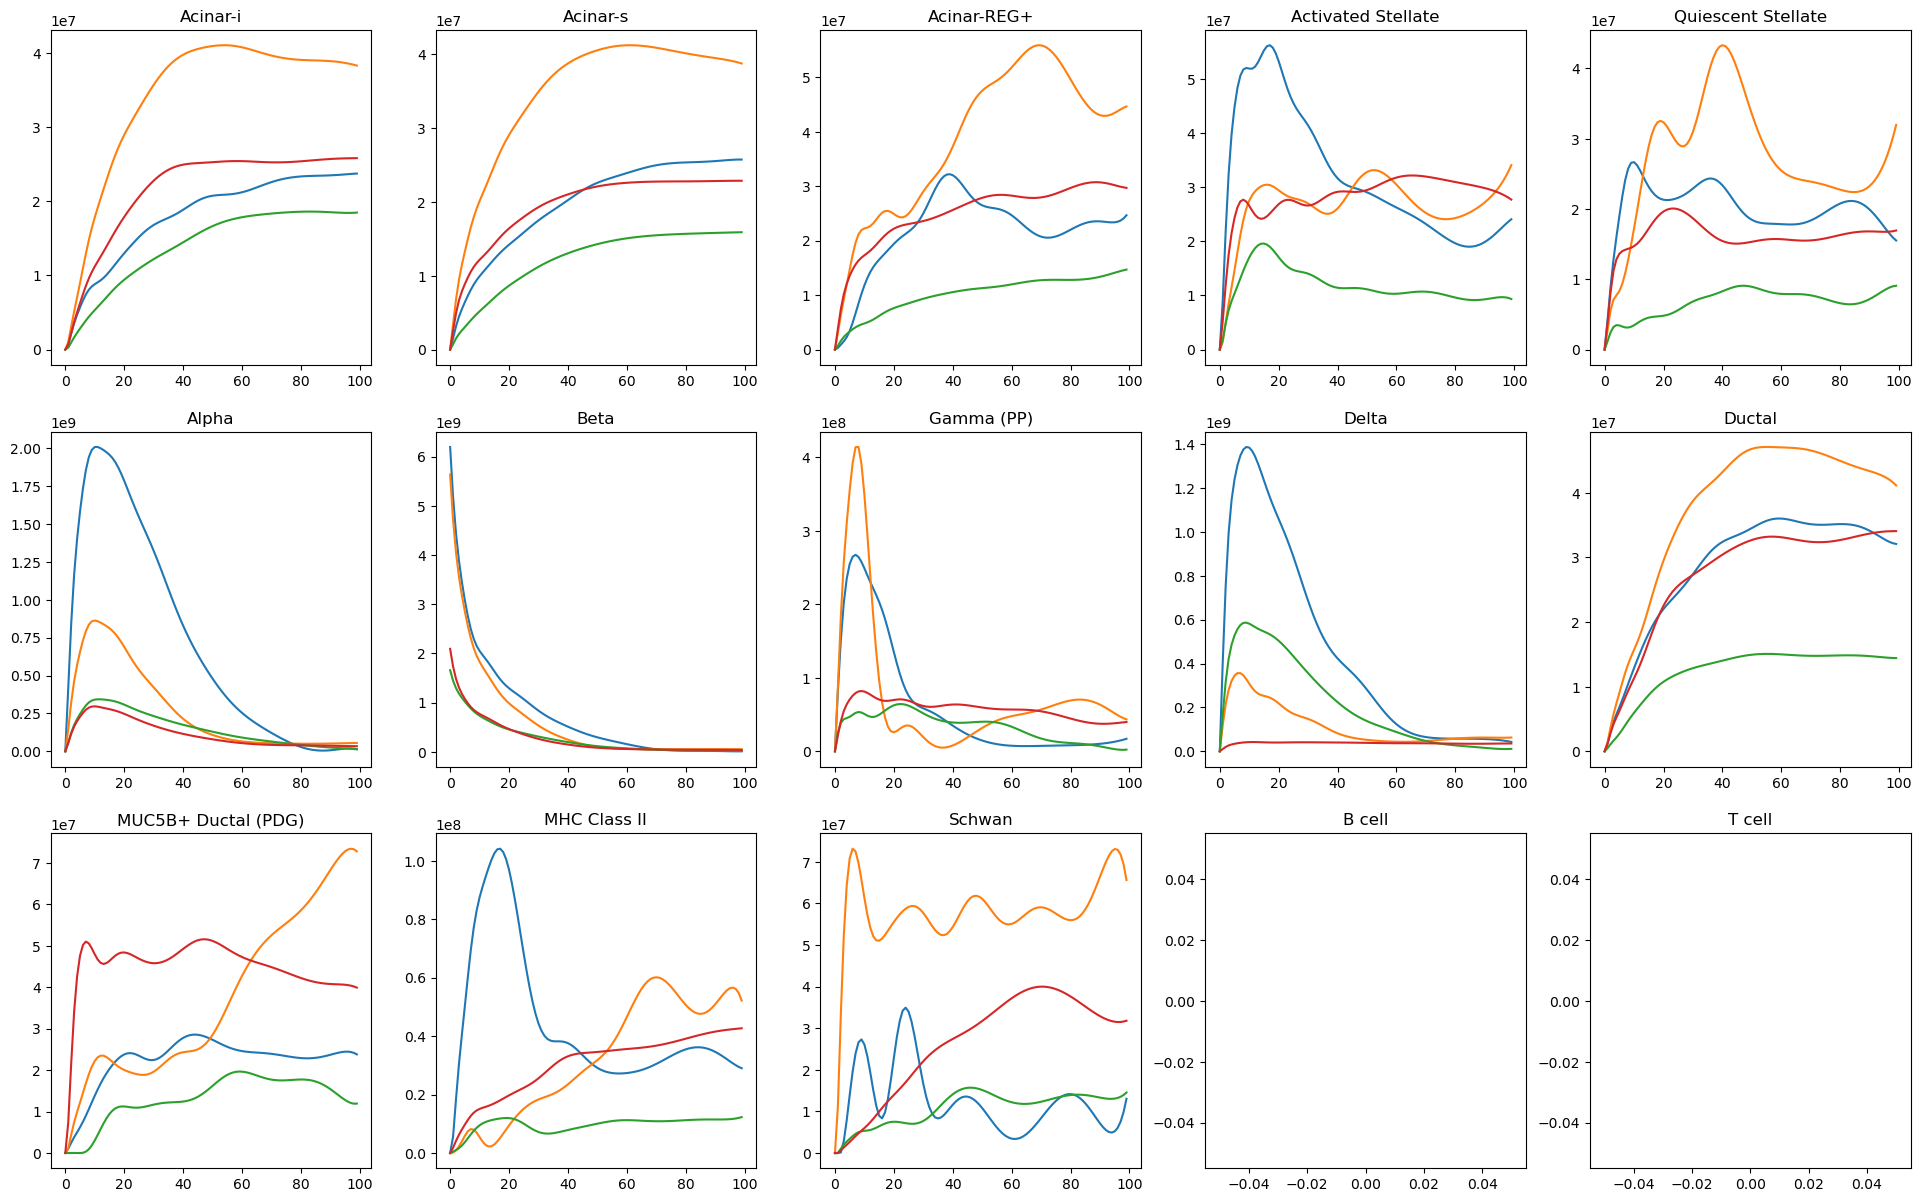

In [60]:
for im in range (15):

    normal = ((np.count_nonzero(rescaled1[7]))/np.count_nonzero(rescaled1))*((np.count_nonzero(rescaled1[im+1]))/np.count_nonzero(rescaled1))
    
    plt.subplot(4,5, im+1) #background excluded
    plt.rcParams['figure.figsize'] = [24, 20]

    normal1 = ((np.count_nonzero(rescaled1[7]))/np.count_nonzero(rescaled1))*((np.count_nonzero(rescaled1[im+1]))/np.count_nonzero(rescaled1))
    plt.plot(cooc_template1_[7,im+1]/normal1)
    normal2 = ((np.count_nonzero(rescaled2[7]))/np.count_nonzero(rescaled2))*((np.count_nonzero(rescaled2[im+1]))/np.count_nonzero(rescaled2))
    plt.plot(cooc_template2_[7,im+1]/normal2)
    normal3 = ((np.count_nonzero(rescaled3[7]))/np.count_nonzero(rescaled3))*((np.count_nonzero(rescaled3[im+1]))/np.count_nonzero(rescaled3))
    plt.plot(cooc_template3_[7,im+1]/normal3)
    normal4 = ((np.count_nonzero(rescaled4[7]))/np.count_nonzero(rescaled4))*((np.count_nonzero(rescaled4[im+1]))/np.count_nonzero(rescaled4))
    plt.plot(cooc_template4_[7,im+1]/normal4)
    
    plt.title(cluster_labels[im+1])

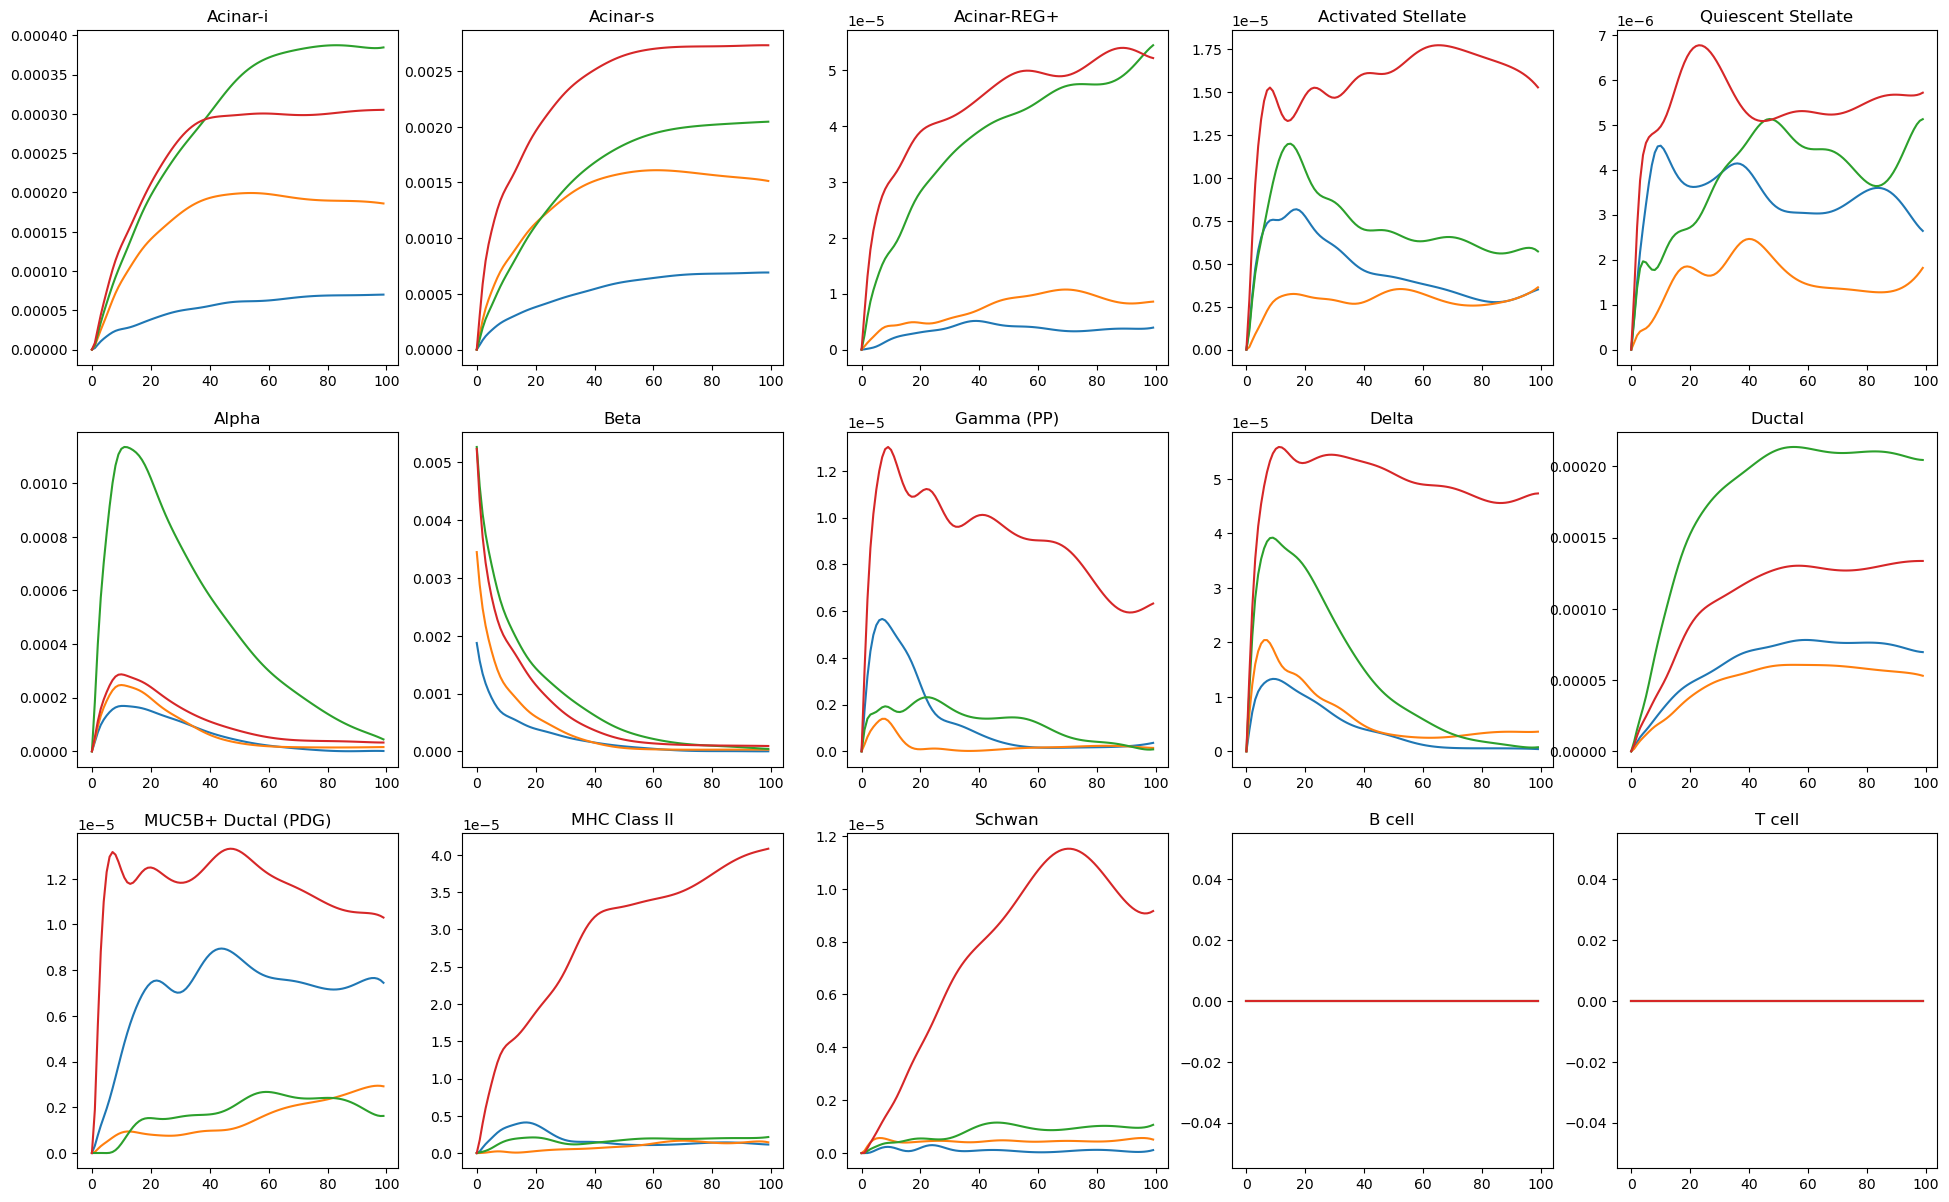

In [62]:
for im in range (15):
    
    plt.subplot(4,5, im+1) #background excluded
    plt.rcParams['figure.figsize'] = [24, 20]
    plt.plot(cooc_template1_[7,im+1]/np.count_nonzero(rescaled1))
    plt.plot(cooc_template2_[7,im+1]/np.count_nonzero(rescaled2))
    plt.plot(cooc_template3_[7,im+1]/np.count_nonzero(rescaled3))
    plt.plot(cooc_template4_[7,im+1]/np.count_nonzero(rescaled4))

    plt.title(cluster_labels[im+1])

In [30]:
cell_matrix_ecm = torch.zeros((rescaled1.shape[0]+1,)+rescaled1.shape[1:])
cell_matrix_ecm[:-1]=torch.tensor(rescaled1)
cell_matrix_ecm[-1]=~(cell_matrix_ecm.sum(0)>0)

# plt.imshow(cell_matrix_ecm[-1].cpu())

cell_matrix_ecm = cell_matrix_ecm.cpu().numpy()

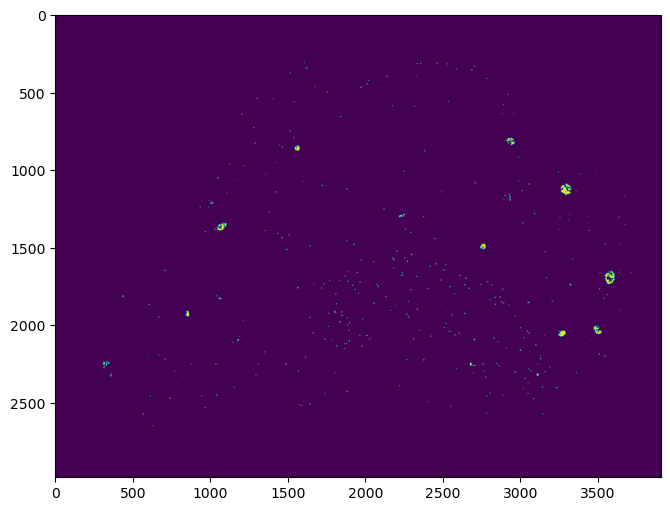

In [31]:
plt.rcParams['figure.figsize'] = [11, 6]
plt.imshow(rescaled1[7])


In [32]:
rescaled1[7].shape

(2980, 3906)

In [66]:
non_zero_count_all_cells = np.count_nonzero(rescaled1)
print(non_zero_count_all_cells)

11622454


In [43]:
non_zero_count_1ct = np.count_nonzero(rescaled1[7])
print(non_zero_count_1ct)

21803


In [41]:
cooc_template1_[7,8]

array([-4.20122679e-15,  2.02434369e+01,  3.73425906e+01,  4.97713424e+01,
        5.78822808e+01,  6.27297584e+01,  6.51903150e+01,  6.58379567e+01,
        6.51147297e+01,  6.34588594e+01,  6.12961377e+01,  5.89774394e+01,
        5.67152718e+01,  5.45490960e+01,  5.23836797e+01,  5.00562209e+01,
        4.74045777e+01,  4.43346216e+01,  4.08647854e+01,  3.71127243e+01,
        3.32591710e+01,  2.95109148e+01,  2.60637802e+01,  2.30660488e+01,
        2.05934022e+01,  1.86531110e+01,  1.71997448e+01,  1.61513254e+01,
        1.54054802e+01,  1.48555948e+01,  1.44067997e+01,  1.39876125e+01,
        1.35505541e+01,  1.30684217e+01,  1.25303937e+01,  1.19381361e+01,
        1.13019074e+01,  1.06366643e+01,  9.95820276e+00,  9.28020930e+00,
        8.61362692e+00,  7.96693169e+00,  7.34644460e+00,  6.75664344e+00,
        6.20047458e+00,  5.67966485e+00,  5.19503335e+00,  4.74680085e+00,
        4.33483555e+00,  3.95873729e+00,  3.61785820e+00,  3.31132081e+00,
        3.03803624e+00,  